# District Literacy Analysis

## Introduction

In this notebook, I will analyze literacy rate data for districts in a large nation, where I am working as a data professional for the Department of Education. This dataset provides valuable insights into education levels across different regions. By exploring the distribution of literacy rates and identifying key patterns, this analysis will contribute to a better understanding of educational disparities and trends.

## Overview

In this notebook, I will explore and analyze literacy rate data for each district, applying various statistical techniques to summarize and interpret the dataset. To achieve this, I will perform the following analyses:

- Compute descriptive statistics to summarize district literacy rates.
- Use the normal distribution to model the data and identify patterns.
- Calculate z-scores to detect potential outliers.
- Simulate random sampling and estimate population means.
- Construct confidence intervals to assess the reliability of estimates.
- Conduct a two-sample hypothesis test to compare different district literacy rates.

By performing these analyses, I aim to gain a deeper understanding of literacy trends across districts, evaluate data distribution characteristics, and ensure the accuracy and reliability of the dataset for further research.


## Dataset Structure

### District Demographics Dataset
This dataset contains demographic and administrative information about various districts in a given state. Each record represents a district and includes details on its population, administrative divisions, and literacy rates. Below is a description of the key fields in this dataset:

- **DISTNAME**: The name of the district.
- **STATNAME**: The name of the state to which the district belongs.
- **BLOCKS**: The number of administrative blocks within the district.
- **VILLAGES**: The total number of villages in the district.
- **CLUSTERS**: The number of clusters present in the district.
- **TOTPOPULAT**: The total population of the district.
- **OVERALL_LI**: The overall literacy rate of the district (expressed as a percentage).


## Importing Required Libraries
Before beginning the analysis, it is essential to import all necessary libraries. 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Exploring Data Insights: Computing Descriptive Statistics with Python

## Introduction

In this section, I will compute descriptive statistics to explore and summarize the literacy rate data for each district in the education dataset. Descriptive statistics provide key insights into the distribution, central tendency, and variability of the data, helping me better understand patterns and trends. This step follows data cleaning and serves as a crucial part of exploratory data analysis (EDA), allowing me to assess the dataset before moving on to more complex analyses. By summarizing the dataset numerically, I can identify potential outliers, detect inconsistencies, and gain a clearer picture of the overall data structure.

I will load the dataset and display a sample of the data.

In [2]:
education_districtwise = pd.read_csv(r'C:\Users\saswa\Documents\GitHub\District-Literacy-Analysis\Data\education_districtwise.csv')

### Exploring the Data

To get a quick overview of the dataset, I use the `head()` function. This allows me to see the first few rows and understand the structure of the data.

In [3]:
education_districtwise.head(10)

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00
5,DISTRICT323,STATE1,12,523,96,1070144.0,64.32
6,DISTRICT114,STATE1,6,110,49,147104.0,80.48
7,DISTRICT438,STATE1,7,134,54,143388.0,74.49
8,DISTRICT610,STATE1,10,388,80,409576.0,65.97
9,DISTRICT476,STATE1,11,361,86,555357.0,69.90


Each row in this dataset represents a district, not a state or village. Some key columns I note:

- `VILLAGES`: Number of villages in each district

- `TOTPOPULAT`: Population of each district

- `OVERALL_LI`: Literacy rate for each district

Understanding this hierarchy helps me analyze the data correctly.

#### Computing Descriptive Statistics

Once I have an idea of the dataset, I use Python’s `describe()` function to compute key statistics. This function is useful because it provides multiple descriptive statistics at once.

In [4]:
education_districtwise['OVERALL_LI'].describe()

count    634.000000
mean      73.395189
std       10.098460
min       37.220000
25%       66.437500
50%       73.490000
75%       80.815000
max       98.760000
Name: OVERALL_LI, dtype: float64

Here’s what each metric means:

- `count`: Total number of districts with available literacy rate data

- `mean`: Average literacy rate across all districts

- `std`: Standard deviation, showing how much the data varies

- `min` and `max`: Lowest and highest literacy rates

- `25%`, `50%`, `75%`: Percentile values that help understand data distribution

From the output, I learn that the average literacy rate is about 73%, which helps me compare individual districts against the national trend.

#### Analyzing Categorical Data

I also explore categorical data using `describe()`. For example, I check how many unique states are represented and which state appears the most:

In [5]:
education_districtwise['STATNAME'].describe()

count         680
unique         36
top       STATE21
freq           75
Name: STATNAME, dtype: object

The dataset contains 36 unique states. The most common state (`STATE21`) appears in 75 districts, meaning it has more districts compared to other states. This information could be useful in identifying states with a higher need for educational resources.

#### Calculating Range in Literacy Rate

To measure the spread of literacy rates, I calculate the range using the max() and min() functions.

In [6]:
range_overall_li = education_districtwise['OVERALL_LI'].max() - education_districtwise['OVERALL_LI'].min()
range_overall_li

np.float64(61.540000000000006)

The result shows a range of about 61.5 percentage points, indicating significant differences in literacy rates among districts. This variation highlights disparities in education levels across different regions.

### Key Takeaways

- The dataset contains literacy rate data for different districts, helping in identifying educational disparities.

- The average literacy rate is about 73%, providing a benchmark for comparison.

- Some districts have significantly lower literacy rates than others, with a range of 61.5 percentage points.

- The most common state in the dataset includes 75 districts, showing variation in state-wise district representation.

# Analyzing Probability Distributions in Python

## Introduction
In this section, I will use the normal distribution to model the data and compute z-scores to identify potential outliers. By analyzing the distribution of district literacy rates, I can determine whether the data follows a specific pattern and detect any anomalies. This builds on my previous analysis, where I summarized the data using descriptive statistics. Now, I will take a deeper dive into probability distributions to uncover meaningful insights about literacy rates across districts by determining whether the data follows a specific type of probability distribution.

Throughout this analysis, I will use pandas and numpy for data manipulation, matplotlib for visualization, and the SciPy stats module for statistical analysis. The SciPy stats module provides a comprehensive set of functions for working with probability distributions and statistical calculations, making it a valuable tool for this analysis.

In [7]:
education_districtwise = education_districtwise.dropna()

NOTE: I use dropna() to remove missing values in my data.

In [8]:
education_districtwise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634 entries, 0 to 679
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DISTNAME    634 non-null    object 
 1   STATNAME    634 non-null    object 
 2   BLOCKS      634 non-null    int64  
 3   VILLAGES    634 non-null    int64  
 4   CLUSTERS    634 non-null    int64  
 5   TOTPOPULAT  634 non-null    float64
 6   OVERALL_LI  634 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 39.6+ KB


### Plot a histogram

The first step in trying to model my data with a probability distribution is to plot a histogram. This helps me visualize the shape of my data and determine if it resembles the shape of a specific distribution.

I use matplotlib’s histogram function to plot a histogram of the district literacy rate data. The `OVERALL_LI` column contains this data.

<Axes: >

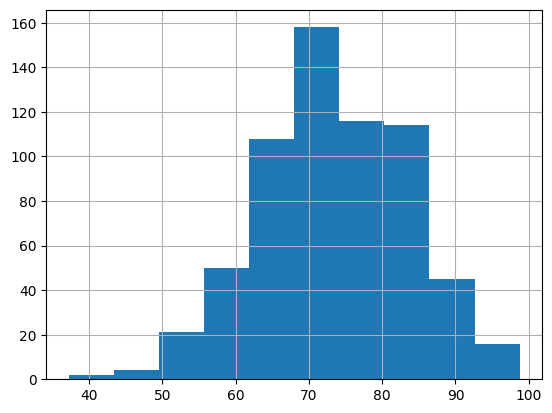

In [9]:
education_districtwise['OVERALL_LI'].hist()

## Normal distribution

The histogram shows that the distribution of the literacy rate data is bell-shaped and symmetric about the mean. The mean literacy rate, which is around 73%, is located in the center of the plot. The normal distribution is a continuous probability distribution that is bell-shaped and symmetrical on both sides of the mean. The shape of the histogram suggests that the normal distribution might be a good modeling option for the data.

## Empirical rule

Since the normal distribution seems like a good fit for the district literacy rate data, I can expect the empirical rule to apply relatively well. **The empirical rule** states that for a normal distribution:

- **68%** of the values fall within +/- 1 SD from the mean

- **95%** of the values fall within +/- 2 SD from the mean

- **99.7%** of the values fall within +/- 3 SD from the mean

NOTE: "SD" stands for standard deviation.

I name two new variables to store the values for the mean and standard deviation of the district literacy rate: `mean_overall_li` and `std_overall_li`.

In [10]:
mean_overall_li = education_districtwise['OVERALL_LI'].mean()
std_overall_li = education_districtwise['OVERALL_LI'].std()

Now, I compute the actual percentage of district literacy rates that fall within +/- 1 SD from the mean.

In [11]:
lower_limit = mean_overall_li - 1 * std_overall_li
upper_limit = mean_overall_li + 1 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

np.float64(0.6640378548895899)

Next, I compute the actual percentage of district literacy rates that fall within +/- 2 SD from the mean.

In [12]:
lower_limit = mean_overall_li - 2 * std_overall_li
upper_limit = mean_overall_li + 2 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

np.float64(0.9542586750788643)

Finally, I compute the actual percentage of district literacy rates that fall within +/- 3 SD from the mean.

In [13]:
lower_limit = mean_overall_li - 3 * std_overall_li
upper_limit = mean_overall_li + 3 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

np.float64(0.9968454258675079)

My values agree quite well with the empirical rule!

My values of 66.4%, 95.4%, and 99.6% are very close to the values the empirical rule suggests: roughly 68%, 95%, and 99.7%.

Knowing that my data is normally distributed is useful for analysis because many statistical tests and machine learning models assume a normal distribution. Plus, when my data follows a normal distribution, I can use z-scores to measure the relative position of my values and find outliers in my data.

## Compute z-scores to find outliers

A z-score is a measure of how many standard deviations below or above the population mean a data point is. A z-score is useful because it tells me where a value lies in a distribution.

Data professionals often use z-scores for outlier detection. Typically, they consider observations with a z-score smaller than -3 or larger than +3 as outliers. In other words, these are values that lie more than +/- 3 SDs from the mean.

To find outliers in the data, I first create a new column called `Z_SCORE` that includes the z-scores for each district literacy rate in my dataset.

In [14]:
education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])
education_districtwise

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,-0.641712
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,-0.640721
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,-0.216559
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,-1.527694
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,-0.831990
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,0.461307
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,-1.717972
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,-0.827035
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,-0.717030


Now that I have computed z-scores for my dataset, I write some code to identify outliers, or districts with z-scores that are more than +/- 3 SDs from the mean.

In [15]:
education_districtwise[(education_districtwise['Z_SCORE'] > 3) | (education_districtwise['Z_SCORE'] < -3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


Using z-scores, I identify two outlying districts that have unusually low literacy rates: DISTRICT461 and DISTRICT429. The literacy rates in these two districts are more than 3 SDs below the overall mean literacy rate.

My analysis gives me important information to share. The government may want to provide more funding and resources to these two districts in the hopes of significantly improving literacy.


### Key Takeaways

- The literacy rate data follows a normal distribution, making it suitable for statistical analysis using the empirical rule and z-scores.  
- The average literacy rate is around **73%**, serving as a central reference point for district comparisons.  
- The empirical rule holds well for this dataset, with approximately **66.4%**, **95.4%**, and **99.6%** of values falling within **1, 2, and 3 standard deviations** from the mean, respectively.  
- Z-scores help identify outliers—districts with unusually low literacy rates. Two districts (**DISTRICT461 and DISTRICT429**) were found to have literacy rates more than **3 standard deviations below** the mean.  
- These findings can inform policy decisions, as districts with significantly lower literacy rates may require targeted interventions, funding, and educational resources.

# Mastering Sampling in Python: Techniques and Applications

## Introduction
In this section, I will use Python to simulate random sampling and estimate population parameters from sample data. By leveraging libraries such as NumPy, pandas, SciPy stats, and statsmodels, I will perform statistical operations and analyze sample distributions. Additionally, I will use Matplotlib to visualize data and extract insights from my simulations. These exercises will deepen my understanding of sampling, point estimation, and the role of randomness in statistical inference.

I continue with my previous scenario, in which I am a data professional working for the Department of Education of a large nation. I analyze data on literacy rates for each district. Since I have limited time to collect data, I can only survey 50 randomly chosen districts instead of the 634 districts included in my original dataset. My goal is to estimate the mean literacy rate for all 634 districts based on my sample of 50 districts.

### Simulate Random Sampling

I use `pandas.DataFrame.sample()` to simulate taking a random sample of 50 districts from my dataset. The following arguments in the `sample()` function help me simulate random sampling:

- `n`: Refers to the desired sample size

- `replace`: Indicates whether I am sampling with or without replacement

- `random_state`: Refers to the seed of the random number generator
  
I write my code to generate a sample:

In [16]:
sampled_data = education_districtwise.sample(n=50, replace=True, random_state=31208)
sampled_data

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14,1.857670
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49,-2.071771
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14,-1.115425
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33,0.290849
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70,1.318549
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35,-0.499994
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94,-1.333452
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69,-0.466299
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31,1.081692
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61,-0.375124


The output shows 50 districts randomly selected from my dataset, with some potential duplicates due to sampling with replacement.

#### Compute the Sample Mean

Now that I have my random sample, I compute the sample mean:

In [17]:
estimate1 = sampled_data['OVERALL_LI'].mean()
estimate1

np.float64(74.22359999999999)

The sample mean for district literacy rate is about 74.22%, which is a point estimate of the population mean.

Next, I generate another random sample and compute its mean:

In [18]:
estimate2 = education_districtwise['OVERALL_LI'].sample(n=50, replace=True, random_state=56810).mean()
estimate2

np.float64(74.2478)

The second sample mean is about 74.25%. Due to sampling variability, this sample mean differs slightly from my previous estimate.

### The Central Limit Theorem

The central limit theorem states that when the sample size is large enough, the sample mean approaches a normal distribution. As I sample more observations, the sample mean gets closer to the population mean.

I find the population mean:

In [19]:
population_mean = education_districtwise['OVERALL_LI'].mean()
population_mean

np.float64(73.39518927444796)

The population mean literacy rate is 73.39%. Both sample means (74.22% and 74.25%) are relatively close to this value.

#### Compute the Mean of a Sampling Distribution with 10,000 Samples

I repeat the study 10,000 times and obtain 10,000 point estimates of the mean:

In [20]:
estimate_list = []
for i in range(10000):
    estimate_list.append(education_districtwise['OVERALL_LI'].sample(n=50, replace=True).mean())
    
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

Now, I compute the mean of the sampling distribution:

In [21]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

np.float64(73.4105096)

The mean of my sampling distribution is about 73.4%, which is essentially identical to the population mean.

#### Visualize the Data

I visualize the relationship between my sampling distribution and the normal distribution:

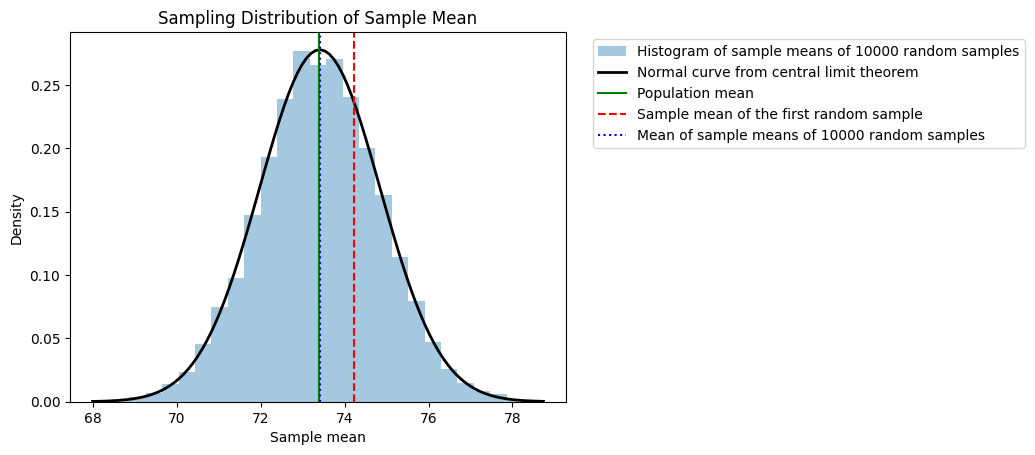

In [22]:
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label="Histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p, 'k', linewidth=2, label='Normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle='solid', label='Population mean')
plt.axvline(x=estimate1, color='r', linestyle='--', label='Sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle=':', label='Mean of sample means of 10000 random samples')
plt.title("Sampling Distribution of Sample Mean")
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

#### Observations from the Sampling Distribution Graph

The histogram of the sampling distribution closely follows a normal curve, as predicted by the central limit theorem.

The mean of the sampling distribution (blue dotted line) overlaps with the population mean (green solid line), confirming their similarity.

The sample mean of my first estimate (red dashed line) is farther from the center due to sampling variability.

The central limit theorem demonstrates that as I increase the sample size, my estimate becomes more accurate. My first sample of 50 districts estimated the mean district literacy rate as 74.22%, which is close to the population mean of 73.4%.

To make my estimate useful to the government, I compare the nation's literacy rate to other benchmarks, such as the global literacy rate or the literacy rate of peer nations. If the nation's literacy rate is below these benchmarks, this may help justify allocating more resources to improve literacy across the country.

### Key Takeaways

- Different random samples result in slightly different sample means due to natural sampling variability.

- As sample size increases, the sample mean distribution approaches a normal curve, improving estimate reliability.

- The mean of 10,000 sample means (73.4%) closely matches the population mean (73.39%), confirming accurate estimation.

- Larger sample sizes reduce variability and improve the precision of point estimates.

- The sampling distribution follows a normal curve, validating the Central Limit Theorem (CLT).

# Constructing Confidence Intervals with Python

## Introduction 

In this section, I will learn how to use Python to construct confidence intervals for point estimates. Confidence intervals provide a range of values within which the true population parameter is likely to fall, helping to quantify uncertainty in statistical estimates. I will explore how to calculate and interpret confidence intervals, enhancing my understanding of statistical inference and data-driven decision-making.

### Selecting a Random Sample

I work with a random sample of 50 districts from the dataset. To maintain consistency in results, I set the random_state parameter to 31208.

In [23]:
sampled_data = education_districtwise.sample(n=50, replace=True, random_state=31208)
sampled_data

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14,1.857670
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49,-2.071771
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14,-1.115425
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33,0.290849
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70,1.318549
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35,-0.499994
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94,-1.333452
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69,-0.466299
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31,1.081692
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61,-0.375124


### Constructing a 95% Confidence Interval

To construct a 95% confidence interval for the mean district literacy rate, I follow these four steps:

1. Identify a sample statistic

2. hoose a confidence level

3. Find the margin of error

4. Calculate the interval

#### Sample Mean

First, I compute the mean literacy rate for the sample data:

In [24]:
sample_mean = sampled_data['OVERALL_LI'].mean()
sample_mean

np.float64(74.22359999999999)

#### Sample Standard Error

Next, I calculate the estimated standard error:

In [25]:
estimated_standard_error = sampled_data['OVERALL_LI'].std() / np.sqrt(sampled_data.shape[0])

#### Computing the Confidence Interval

Using scipy.stats.norm.interval(), I construct the 95% confidence interval:

In [26]:
stats.norm.interval(confidence=0.95, loc=sample_mean, scale=estimated_standard_error)

(np.float64(71.42241096968617), np.float64(77.02478903031381))

This results in a 95% confidence interval for the mean district literacy rate of approximately (71.42, 77.02).

### Constructing a 99% Confidence Interval'

To compute a 99% confidence interval, I modify the alpha parameter to `0.99`:

In [27]:
stats.norm.interval(confidence=0.95, loc=sample_mean, scale=estimated_standard_error)

(np.float64(71.42241096968617), np.float64(77.02478903031381))

This results in a 95% confidence interval for the mean district literacy rate of approximately (71.42, 77.02).

#### Relationship Between Confidence Level and Confidence Interval

Observing the confidence intervals:

95% CI: (71.42, 77.02) → Covers 5.6 percentage points

99% CI: (70.54, 77.90) → Covers 7.4 percentage points

As the confidence level increases, the confidence interval becomes wider. A wider confidence interval increases the likelihood of including the actual population parameter.

These results will assist the Department of Education in distributing government resources to improve literacy rates.

### Key Takeaways

- Confidence intervals provide a range where the true population mean is likely to fall, helping quantify uncertainty in estimates.

- A higher confidence level increases the likelihood of capturing the true mean but results in a wider interval.

- The standard error, derived from sample variability, is crucial for constructing confidence intervals.

- Python's `scipy.stats.norm.interval()` function simplifies confidence interval calculations for large samples.

- Confidence intervals support data-driven decision-making, such as allocating resources in education.